# 01-2 패션 이미지의 분류 정확도를 높여라!

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hm-dl/blob/main/01-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## LetNet-5

In [1]:
import keras
from keras import layers

In [2]:
lenet5 = keras.models.Sequential()
lenet5.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                         padding='same', input_shape=(28,28,1)))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation='sigmoid'))
lenet5.add(layers.Dense(84, activation='sigmoid'))
lenet5.add(layers.Dense(10, activation='softmax'))

In [3]:
lenet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

소프트맥스 함수: $f(x)_i = \dfrac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}}$

$f(x) = \dfrac{e^{z_1}+e^{z_2}+...+e^{z_k}}{\sum_{j=1}^{k}e^{z_j}}=1$

## Conv2D 층

In [4]:
import numpy as np

conv1 = layers.Conv2D(filters=10, kernel_size=(3, 3))
x = np.random.normal(size=(10, 28, 28, 1))
conv_out = conv1(x)
print(conv_out.shape)

(10, 26, 26, 10)


In [5]:
conv2 = layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(2, 2))
print(conv2(x).shape)

(10, 13, 13, 10)


In [6]:
conv3 = layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(2, 2), padding='same')
print(conv3(x).shape)

(10, 14, 14, 10)


In [7]:
conv4 = layers.Conv2D(filters=10, kernel_size=(3, 3), padding='same')
print(conv4(x).shape)

(10, 28, 28, 10)


## AveragePooling2D 층과 Dense 층

In [8]:
pool1 = layers.AveragePooling2D(pool_size=2)
print(pool1(x).shape)

(10, 14, 14, 1)


In [9]:
pool2 = layers.AveragePooling2D(pool_size=3)
print(pool2(x).shape)

(10, 9, 9, 1)


$y = x \cdot W + b$

In [10]:
dense1 = layers.Dense(3, input_shape=(2,))

In [11]:
x2 = np.array([[5, 7]])
print(dense1(x2).shape)

(1, 3)


In [12]:
print(dense1.get_weights())

[array([[-0.80379343,  0.6096556 ,  0.7158011 ],
       [-0.34172356, -0.51199937, -0.84199286]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [13]:
dense1.set_weights([
    np.array([[1, 2, 3], [4, 5, 6]]),
    np.array([0, 0, 0])
])

In [14]:
print(dense1(x2))

tf.Tensor([[33. 45. 57.]], shape=(1, 3), dtype=float32)


In [15]:
weight = dense1.get_weights()[0]
print(np.dot(x2, weight))

[[33. 45. 57.]]


In [16]:
output = lenet5(x)
print(output.shape)

(10, 10)


## 시그모이드 함수와 렐루 함수

시그모이드 함수: $f(x) = \dfrac{1}{1+e^{-x}}$

렐루 함수: $f(x) = \begin{cases}
                    \mbox{max}(0, x), & x\mbox{ >= 0 이면} \\
                    0,                & x\mbox{ < 0 이면}
                 \end{cases}$

In [17]:
a = np.array([-2, -1, 0, 1, 2])
print(a.clip(0))

[0 0 0 1 2]


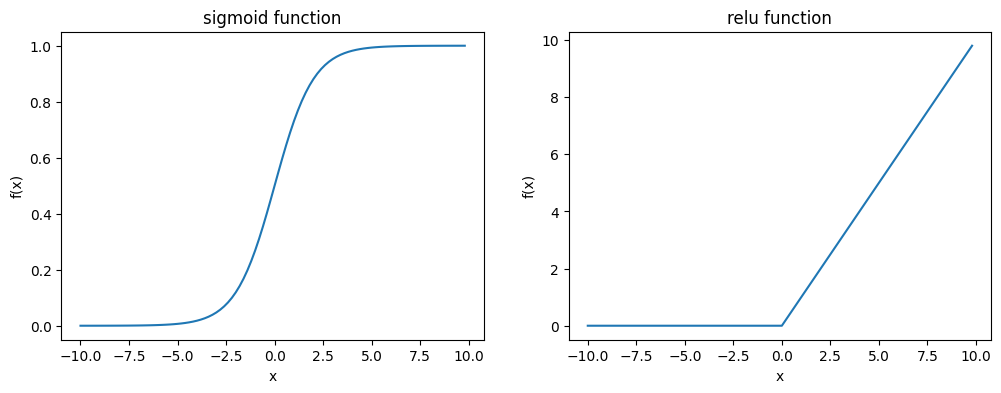

In [18]:
import matplotlib.pyplot as plt
from scipy.special import expit

x = np.arange(-10, 10, 0.2)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(x, expit(x))
axs[0].set_title('sigmoid function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[1].plot(x, x.clip(0))
axs[1].set_title('relu function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
plt.show()

## 모델 훈련

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [20]:
print(train_target)

[5 0 4 ... 5 6 8]


In [21]:
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0

$L = -\sum_{j=1}^m y_j log(\hat{y}_j)$

In [22]:
lenet5.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
hist = lenet5.fit(train_input, train_target, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.9090 - accuracy: 0.6979
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2238 - accuracy: 0.9304
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1483 - accuracy: 0.9540
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1139 - accuracy: 0.9648
Epoch 5/5
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0943 - accuracy: 0.9708


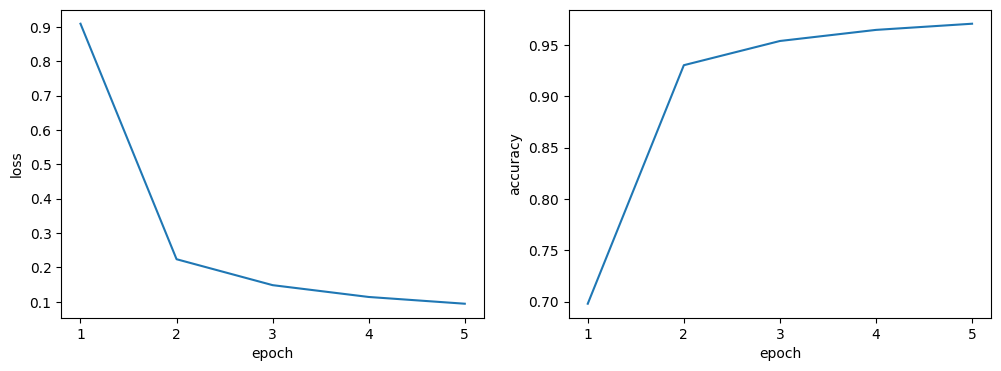

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(range(1, 6), hist.history['loss'])
axs[0].set_xticks(range(1, 6))
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[1].plot(range(1, 6), hist.history['accuracy'])
axs[1].set_xticks(range(1, 6))
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
plt.show()